In [33]:
from sympy import Function, dsolve, Derivative, Eq, lambdify, sin, cos, symbols, solve
from sympy import print_python, print_maple_code, print_latex, latex
from sympy.abc import t

In [34]:
x = Function('x')

eq = Eq(Derivative(Derivative(x(t), t), t) + 4*x(t), 4*sin(4*t) - 2*cos(1.98*t))

solution = dsolve(eq)
print_latex(solution)
display(solution)

Cs = solve(
  [
    Eq(solution.rhs.subs(t, 0), 0),
    Eq(solution.rhs.diff(t).subs(t, 0), 1)
  ],
  symbols("C1, C2")
)

concrete_solution = solution.subs(Cs)
print_latex(concrete_solution)
display(concrete_solution)

x{\left(t \right)} = C_{1} \sin{\left(2 t \right)} + C_{2} \cos{\left(2 t \right)} - 0.333333333333333 \sin{\left(4 t \right)} - 25.1256281407035 \cos{\left(1.98 t \right)}


Eq(x(t), C1*sin(2*t) + C2*cos(2*t) - 0.333333333333333*sin(4*t) - 25.1256281407035*cos(1.98*t))

x{\left(t \right)} = 1.16666666666667 \sin{\left(2 t \right)} - 0.333333333333333 \sin{\left(4 t \right)} - 25.1256281407035 \cos{\left(1.98 t \right)} + 25.1256281407035 \cos{\left(2 t \right)}


Eq(x(t), 1.16666666666667*sin(2*t) - 0.333333333333333*sin(4*t) - 25.1256281407035*cos(1.98*t) + 25.1256281407035*cos(2*t))

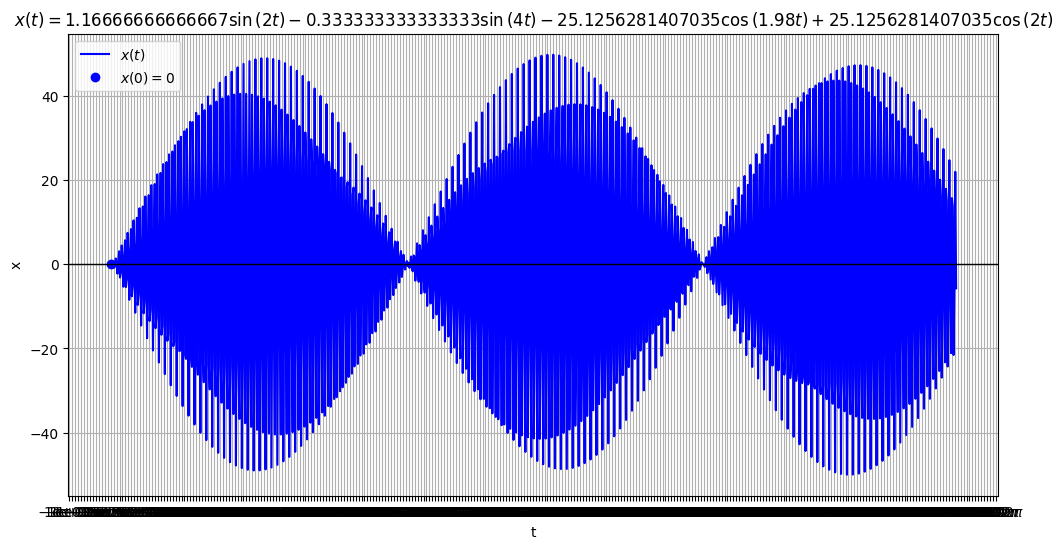

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
from fractions import Fraction as Frac

sol_f = lambdify(t, concrete_solution.rhs)

t_vals = np.linspace(0 * np.pi, 900, 1000)
x_vals = sol_f(t_vals)

_, ax = plt.subplots(figsize=(12, 6))

ax.plot(t_vals, x_vals, color='blue', label=f"$x(t)$")
ax.plot(0, 0, 'bo', label="$x(0)=0$")

ax.set_title(f"${latex(concrete_solution)}$")
ax.axhline(y=0, lw=1, color='k')
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\\pi$'.format(val/np.pi) if val != 0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.savefig('solution.png', dpi=300)

plt.show()

In [36]:
from math import sqrt
min_, max_ = min(x_vals), max(x_vals)
min_, max_, (), sqrt(Frac('7/2')**2 + Frac('1/3')**2 + Frac('2/3')**2 + Frac('2/3'))

(np.float64(-49.958655581979),
 np.float64(49.72719133382353),
 (),
 3.6704525909242065)